# Flood mapping

This notebook aims to step through the same process as Stefania's MATLAB code.

In [4]:
import datacube, rasterio, numpy as np, matplotlib.pyplot as plt, xarray, pandas

In [20]:
lat, lon = -27.1544, 149.0677 # surat
lat, lon = -28.034167, 148.581667 # st george

radius = 0.08

## Loading input data

Initial steps are to load the relevant data (and ancilliaries).

In [6]:
prodcube = datacube.Datacube()
sarcube = datacube.Datacube(config={'db_hostname': 'agdcdev-db.nci.org.au',
                                    'db_port': 6432,
                                    'db_database': 'radar_test'})

In [21]:
wofs_summary = prodcube.load(product='wofs_summary', lat=(lat-radius,lat+radius), lon=(lon-radius,lon+radius))

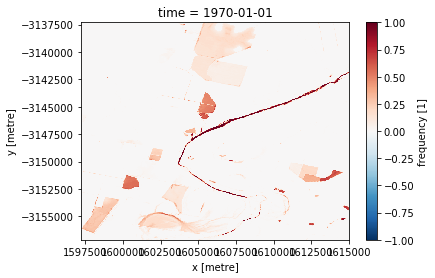

In [22]:
wofs_summary.frequency.plot()

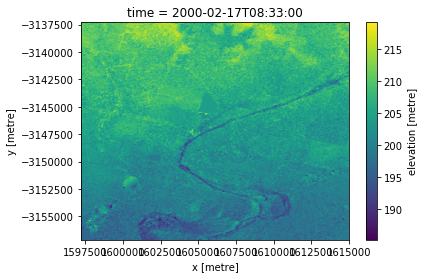

In [30]:
dem = prodcube.load(product='dsm1sv10', like=wofs_summary, time=('1900', '2030'))
dem.elevation.plot()

In [32]:
len(sarcube.find_datasets(product='s1_gamma0_scene', like=wofs_summary, time=('1900', '2030')))

60

## Open Water first-pass

The first step chooses a threshold based on a comparison of backscatter statistics, between the areas that are or are not frequently inundated according to the wofs summary.